# Class: [Data Science](https://git.generalassemb.ly/meccaLeccaHi/dat-sf-60)

**Student:** [Allen Au](https://www.linkedin.com/in/auallen/)    
    
**Date:** Oct. 22, 2019

## Project 2: Analyzing IMDb Data

---

## Basic level

In [2]:
# Import libraries to read, anaylize and visualize data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

In [3]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# this selects the 'style' that matplotlib will use to generate plots
plt.style.use('fivethirtyeight')

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
# Read imdb csv data into movies dataframe
movies = pd.read_csv('./imdb_1000.csv')

# Show the 1st 5 rows
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.


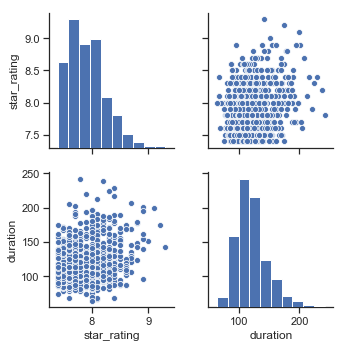

In [5]:
sns.set(style="ticks", color_codes=False)
sns.pairplot(movies)

In [62]:
# Display the number of rows x columns
movies.shape

(979, 6)

In [63]:
# Show the columns of the dateframe
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

#### Check the data type of each column.

In [64]:
# Data Types for each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [65]:
#### Check the data type of each column.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [66]:
# Mean movie duration in minutes
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [67]:
# Longest movie
movies.sort_values(by=['duration'], ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [68]:
# Shortest movie
movies.sort_values(by=['duration'], ascending=False).tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

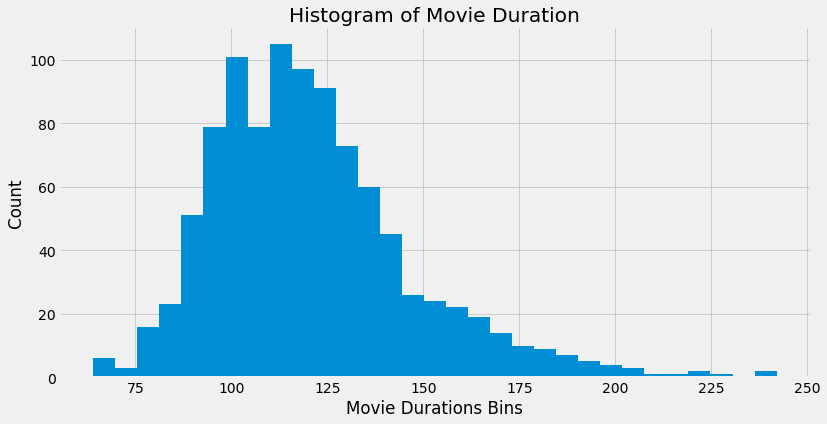

In [69]:
# Histogram for duration
# Using rule of thumb for number of bins: sqrt(979) = 33 bins
ax = movies['duration'].hist(bins=31, figsize=(12,6))

ax.set_title('Histogram of Movie Duration')
ax.set_xlabel("Movie Durations Bins");
ax.set_ylabel("Count");

#### Use a box plot to display that same data.


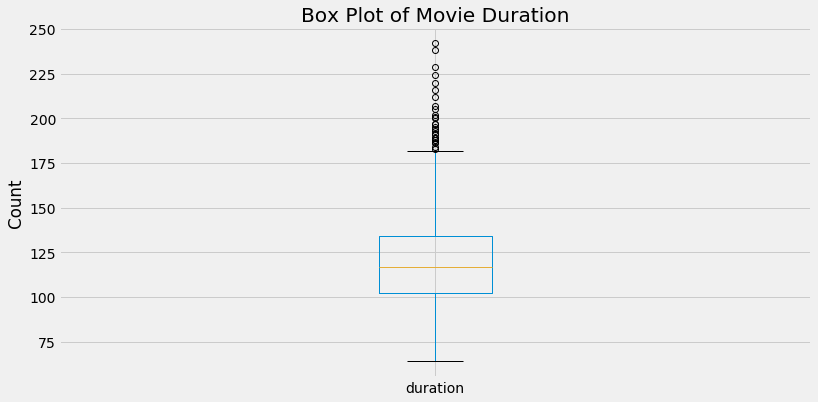

In [70]:
# Box plot for Movie Duration
ax = movies.boxplot(['duration'], figsize=(12,6))
ax.set_title('Box Plot of Movie Duration')
ax.set_ylabel("Count");

# Intermediate Level

#### Count how many movies have each of the content ratings.

In [71]:
# Count of movies for each rating
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

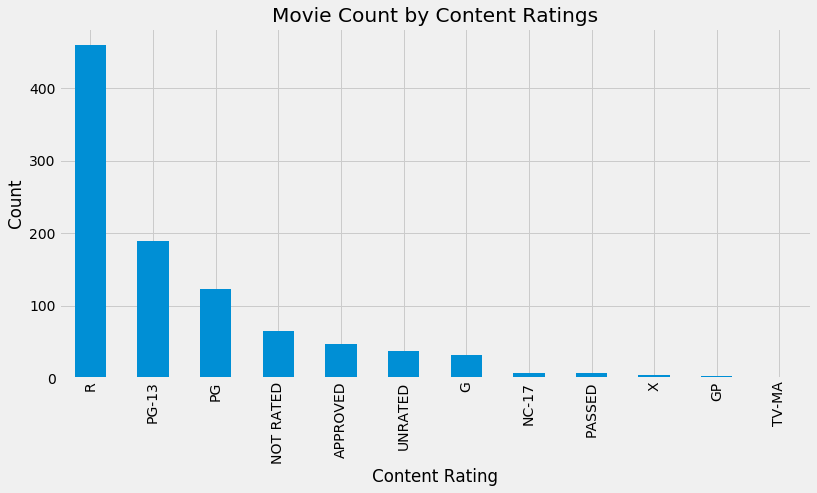

In [72]:
# Count of Movies by Content Rating
ax = movies.content_rating.value_counts().plot.bar(figsize=(12,6))
ax.set_title("Movie Count by Content Ratings");
ax.set_xlabel("Content Rating");
ax.set_ylabel("Count");

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [73]:
# Replacing with UNRATED
movies = movies.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'],'UNRATED')
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [74]:
# Replacing with NC-17
movies = movies.replace(['X', 'TV-MA'],'NC-17')
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

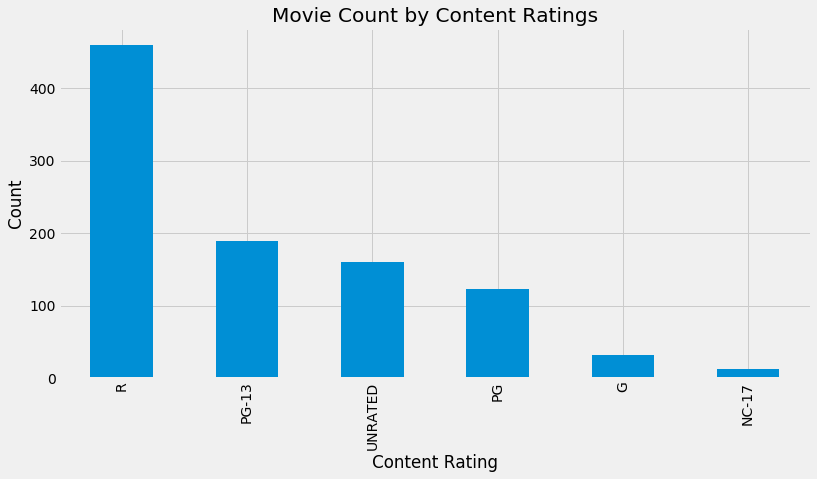

In [75]:
# Count of Movies by Content Rating after multiple replcements
ax = movies.content_rating.value_counts().plot.bar(figsize=(12,6))
ax.set_title("Movie Count by Content Ratings");
ax.set_xlabel("Content Rating");
ax.set_ylabel("Count");

#### Count the number of missing values in each column.

In [76]:
# The number of NaNs for eac column
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [77]:
# Fill NaNs with "UNRATED"
movies.content_rating.fillna("UNRATED", inplace=True)
movies.isna().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [78]:
# Mean Start Rating for movies shorter than 2hrs
movies[(movies['duration'] < 120)].star_rating.mean()

7.838666666666657

In [79]:
# Mean Start Rating for movies longer or euqal to 2hrs
movies[(movies['duration'] >= 120)].star_rating.mean()

7.948898678414082

#### Use a visualization to detect whether there is a relationship between duration and star rating.

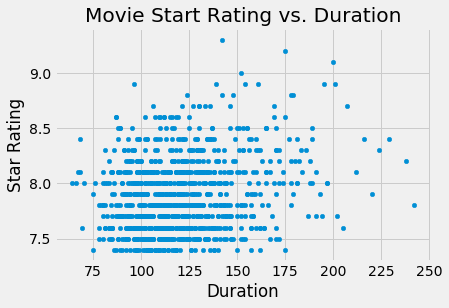

In [80]:
ax = movies.plot.scatter(x='duration', y='star_rating')
ax.set_title("Movie Start Rating vs. Duration");
ax.set_xlabel("Duration");
ax.set_ylabel("Star Rating");

In [81]:
#movies.genre.value_counts()

#### Calculate the average duration for each genre.

In [82]:
movies[movies['genre'] == 'Drama'].duration.mean()

126.53956834532374

In [83]:
movies[movies['genre'] == 'Comedy'].duration.mean()

107.6025641025641

In [84]:
movies[movies['genre'] == 'Action'].duration.mean()

126.48529411764706

In [85]:
movies[movies['genre'] == 'Crime'].duration.mean()

122.29838709677419

In [86]:
movies[movies['genre'] == 'Biography'].duration.mean()

131.84415584415584

In [87]:
movies[movies['genre'] == 'Adventure'].duration.mean()

134.84

In [88]:
movies[movies['genre'] == 'Animation'].duration.mean()

96.59677419354838

In [89]:
movies[movies['genre'] == 'Horror'].duration.mean()

102.51724137931035

In [90]:
movies[movies['genre'] == 'Mystery'].duration.mean()

115.625

In [91]:
movies[movies['genre'] == 'Western'].duration.mean()

136.66666666666666

In [92]:
movies[movies['genre'] == 'Thriller'].duration.mean()

114.2

In [93]:
movies[movies['genre'] == 'Sci-Fi'].duration.mean()

109.0

In [94]:
movies[movies['genre'] == 'Film-Noir'].duration.mean()

97.33333333333333

In [95]:
movies[movies['genre'] == 'Family'].duration.mean()

107.5

In [96]:
movies[movies['genre'] == 'History'].duration.mean()

66.0

In [97]:
movies[movies['genre'] == 'Fantasy'].duration.mean()

112.0

In [98]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

# Advance Level

#### Visualize the relationship between content rating and duration.

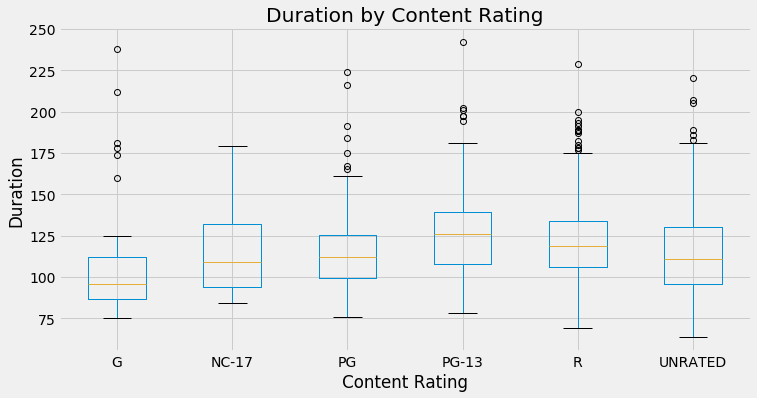

In [99]:
# Content Ratings by Duration
ax = movies.boxplot(column='duration', by='content_rating', figsize=(12,6));
plt.suptitle("") # Gets rid of title automatically generated
ax.set_title('Duration by Content Rating');
ax.set_xlabel('Content Rating');
ax.set_ylabel('Duration');

In [100]:
#movies.groupcontent_rating

#### Determine the top rated movie (by star rating) for each genre.

In [101]:
# Option 1: Iterate with python

# Generate list of unque genres
unique_genres = movies.genre.unique()

# Iterate through unique genres
for g in unique_genres:
    # Filter movies given a genre; sort by star_rating; find the higest rating 
    max_star = movies[movies['genre'] == g].sort_values('star_rating', ascending=False).head(1)
    # Create a slice movies to only include genre, title, and star_rating
    max_star = max_star[['genre', 'title', 'star_rating']]
    print(max_star)
    #print("Max Star Rating: {}".format(max_star))

   genre                     title  star_rating
0  Crime  The Shawshank Redemption          9.3
    genre            title  star_rating
3  Action  The Dark Knight          9.0
   genre         title  star_rating
5  Drama  12 Angry Men          8.9
     genre                           title  star_rating
6  Western  The Good, the Bad and the Ugly          8.9
       genre                                          title  star_rating
7  Adventure  The Lord of the Rings: The Return of the King          8.9
       genre             title  star_rating
8  Biography  Schindler's List          8.9
     genre              title  star_rating
25  Comedy  Life Is Beautiful          8.6
        genre          title  star_rating
30  Animation  Spirited Away          8.6
      genre        title  star_rating
38  Mystery  Rear Window          8.6
     genre   title  star_rating
39  Horror  Psycho          8.6
         genre          title  star_rating
105  Film-Noir  The Third Man          8.3
      genr

In [102]:
# Option 2: Use pandas groupby

# movies[movies['genre'] == 'Sci-Fi'].sort_values(by='star_rating', ascending=False).head(1)
movies.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [103]:
# Find duplicates and print all rows
movies[movies['title'].duplicated(False)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


Upon review of the movies with duplicate titles, the movies are not real duplicates based on the following: 
* The Girl wth the Dragon Tatoo: Duration and actors are different
* True Grit: Duction is different and actors are diffent
* Les Miserables: Genre, Duration, and actors are different
* Dracula: Duration and actors are different

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies

In [104]:
# Creates array of unique movie genres
unique_genres = movies.genre.unique()
#print(unique_genres)

In [105]:
# Iteraate unique list of unique movie genres
for genre in unique_genres:    
    # Identifies movie genres with more than 10 movies
    if (movies[movies['genre'] == genre].star_rating.count()) >= 10:
        # Calculates and prints the mean star_rating
        mean_star_rating_for_g = movies[movies['genre'] == genre].star_rating.mean()
        print("{} has >= 10 movies with Mean Star Rating: {} ".format(genre, mean_star_rating_for_g))
    
#movies.groupby('genre').star_rating.mean()

Crime has >= 10 movies with Mean Star Rating: 7.916935483870971 
Action has >= 10 movies with Mean Star Rating: 7.88455882352942 
Drama has >= 10 movies with Mean Star Rating: 7.902517985611515 
Adventure has >= 10 movies with Mean Star Rating: 7.933333333333332 
Biography has >= 10 movies with Mean Star Rating: 7.862337662337664 
Comedy has >= 10 movies with Mean Star Rating: 7.82243589743591 
Animation has >= 10 movies with Mean Star Rating: 7.914516129032259 
Mystery has >= 10 movies with Mean Star Rating: 7.975 
Horror has >= 10 movies with Mean Star Rating: 7.8068965517241375 


## Bonus

#### Figure out something "interesting" using the actors data!

In [106]:
# Pointers:
# https://stackoverflow.com/questions/20510768/count-frequency-of-words-in-a-list-and-sort-by-frequency
# https://programminghistorian.org/en/lessons/counting-frequencies
# https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

# https://stackoverflow.com/questions/23119472/in-pandas-python-reading-array-stored-as-string

act = movies['actors_list']
#for actors in act:
#    print(type(actors))
#    print(">>{}<<".format(actors))

##### Are there actors in multiple movies?

In [107]:
# Iterate through each row and cell to find each actor.
# Append every instance of an actor into a list.

all_actors = []
actors_by_movies = act.apply(literal_eval)
for actors_list in actors_by_movies:
    for actor in actors_list:
        all_actors.append(actor)
        
#print(all_actors)
# Create a hash with Key: Actor / Value: Number of the movies they appeared in
freq = {}
for actor in all_actors: 
    if (actor in freq): 
        freq[actor] += 1
    else: 
        freq[actor] = 1

# Print out hash of actors : number_of_movies
#print(freq)
print("Actor : Movie Count")
max_count = 0
leading_actor = ""
for key, value in freq.items(): 
    print(" {} : {}".format(key, value)) 
    if value > max_count:
        max_count = value
        leading_actor = key


Actor : Movie Count
 Tim Robbins : 5
 Morgan Freeman : 8
 Bob Gunton : 1
 Marlon Brando : 4
 Al Pacino : 13
 James Caan : 2
 Robert De Niro : 18
 Robert Duvall : 7
 Christian Bale : 11
 Heath Ledger : 2
 Aaron Eckhart : 2
 John Travolta : 1
 Uma Thurman : 5
 Samuel L. Jackson : 6
 Henry Fonda : 3
 Lee J. Cobb : 2
 Martin Balsam : 1
 Clint Eastwood : 14
 Eli Wallach : 1
 Lee Van Cleef : 2
 Elijah Wood : 5
 Viggo Mortensen : 4
 Ian McKellen : 8
 Liam Neeson : 5
 Ralph Fiennes : 7
 Ben Kingsley : 4
 Brad Pitt : 14
 Edward Norton : 7
 Helena Bonham Carter : 4
 Orlando Bloom : 2
 Leonardo DiCaprio : 11
 Joseph Gordon-Levitt : 6
 Ellen Page : 2
 Mark Hamill : 3
 Harrison Ford : 10
 Carrie Fisher : 4
 Tom Hanks : 14
 Robin Wright : 3
 Gary Sinise : 2
 Matthew McConaughey : 4
 Anne Hathaway : 3
 Jessica Chastain : 3
 Jack Nicholson : 9
 Louise Fletcher : 1
 Michael Berryman : 1
 Toshirô Mifune : 3
 Takashi Shimura : 2
 Keiko Tsushima : 1
 Ray Liotta : 2
 Joe Pesci : 5
 Keanu Reeves : 3
 Lauren

 Dan Hedaya : 1
 Thomas Turgoose : 1
 Stephen Graham : 1
 Jo Hartley : 1
 Li Sun : 1
 Yong Dong : 1
 Glenn Close : 2
 Leigh Whannell : 1
 Adriana Caselotti : 1
 Harry Stockwell : 1
 Lucille La Verne : 1
 Teri Hatcher : 1
 John Hodgman : 1
 Josh Hutcherson : 1
 Liam Hemsworth : 1
 Kevin Kline : 4
 Peter MacNicol : 1
 Sylvie Testud : 1
 Pascal Greggory : 1
 Hayden Christensen : 2
 Hailee Steinfeld : 1
 Griffin Dunne : 1
 Rosanna Arquette : 2
 Verna Bloom : 2
 Kristen Bell : 1
 Idina Menzel : 1
 Jonathan Groff : 1
 Sue Lyon : 1
 Owen Wilson : 1
 Dave Goelz : 1
 Steve Whitmire : 1
 Bob Hoskins : 1
 Joanna Cassidy : 1
 Yeong-ae Lee : 1
 Shi-hoo Kim : 1
 Rose McGowan : 1
 Danny Trejo : 1
 Mikael Persbrandt : 1
 Trine Dyrholm : 1
 Markus Rygaard : 1
 David Hemmings : 1
 Vanessa Redgrave : 1
 Sarah Miles : 1
 Bridgit Mendler : 1
 Amy Poehler : 1
 Will Arnett : 1
 Michelle Monaghan : 2
 Bill Pullman : 1
 John Roselius : 1
 John Leguizamo : 2
 Keisha Castle-Hughes : 1
 Rawiri Paratene : 1
 Vicky

Yes!  There are many actors with a movie count > 1

##### Which actowere in the most number of movies?

In [108]:
# Print out the Leading Actor in most number of films
print("Actor with Most Movies: {} in {} movies".format(leading_actor, max_count))

Actor with Most Movies: Robert De Niro in 18 movies


In [111]:
# Push the hash back into a dataframe and find Top 10 actors with the most movies
actors_by_movie_count = pd.DataFrame(list(freq.items()), columns=['actor', 'movie_count']).sort_values(by='movie_count', ascending=False)

# Reset Index
actors_by_movie_count = actors_by_movie_count.reset_index(drop=True)

# Print Top 10 Actors with most number movies
actors_by_movie_count.head(10)

,actor,movie_count
0,Robert De Niro,18
1,Clint Eastwood,14
2,Brad Pitt,14
3,Tom Hanks,14
4,Al Pacino,13
5,Johnny Depp,12
6,Leonardo DiCaprio,11
7,Christian Bale,11
8,Dustin Hoffman,11
9,James Stewart,10


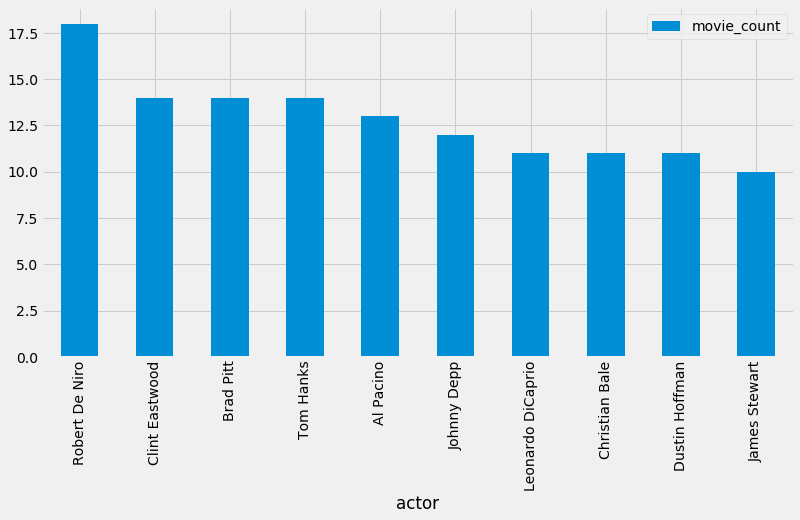

In [112]:
# Show Bar Char of Top 10 actors with most movies
actors_by_movie_count.head(10).plot.bar(x='actor', y='movie_count',figsize=(12,6))
ax.set_title("Movie Count by Actors");
ax.set_xlabel("Actors");
ax.set_ylabel("Movie Count");

#### Additonal Questions to Explore
* Which actors were in each content rating?
* What type of genre did a given actor appear mostly in?